In [1]:
import numpy as np
import pandas as pd
president_df = pd.read_csv("1976-2016-president.csv")

In [2]:
#sample the data
president_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [3]:
#list the columns of the data frame
list(president_df.columns)

['year',
 'state',
 'state_po',
 'state_fips',
 'state_cen',
 'state_ic',
 'office',
 'candidate',
 'party',
 'writein',
 'candidatevotes',
 'totalvotes',
 'version',
 'notes']

In [4]:
#find the number of unique states in the US
president_df.state.nunique()

51

In [5]:
#remove the unwanted columns state_fips, state_cen,state_ic,office,version,notes.
#inplace=true removes the columns in inline. axis=1 -> removes columns
president_df.drop(['state_po', 'state_fips', 'state_cen', 'state_ic',
'office', 'version', 'notes'], axis=1, inplace=True)
president_df.head()


,year,state,candidate,party,writein,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,False,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,False,504070,1182850
2,1976,Alabama,"Maddox, Lester",american independent party,False,9198,1182850
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850
4,1976,Alabama,"Hall, Gus",communist party use,False,1954,1182850


In [6]:
#Get the votes in each year for every state
yearly_votes_state = president_df[['year','state','totalvotes']]\
.groupby(['year','state']).mean().reset_index()
yearly_votes_state.head()

,year,state,totalvotes
0,1976,Alabama,1182850
1,1976,Alaska,123574
2,1976,Arizona,742719
3,1976,Arkansas,767535
4,1976,California,7803770


In [7]:
#Total votes in every election year cacrss US
yearly_votes=yearly_votes_state.groupby('year').sum()

<AxesSubplot:title={'center':'Total Number of Votes in US Presendial Elections'}, xlabel='year'>

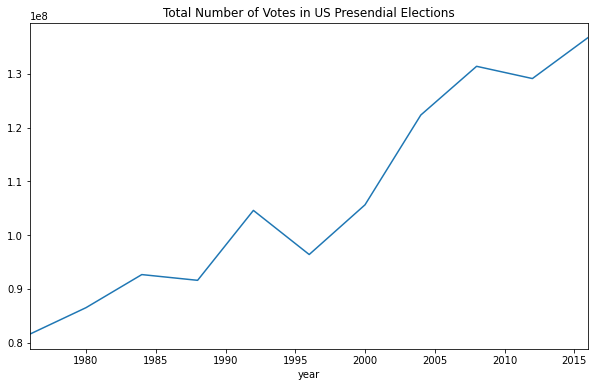

In [8]:
#uset the magic function to display the plot inline
%matplotlib inline
yearly_votes.groupby('year').sum()\
.plot(figsize=(10,6), legend=False,
title='Total Number of Votes in US Presendial Elections')

In [11]:
#the above dataset doesnt contain the winner for each election . we can ge that data from a wikipedia dataset
presidents_dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States")

In [13]:
type(presidents_dfs)

list

In [17]:
#Extract  the second dataframe in the list of dataframes
presidents_dfs[1].head()

,Presidency[a],Presidency[a].1,President,President.1,Party[b],Party[b].1,Election,Vice President
0,1,"April 30, 1789–March 4, 1797",NaN,George Washington,NaN,Unaffiliated,1788–89,John Adams[c]
1,1,"April 30, 1789–March 4, 1797",NaN,George Washington,NaN,Unaffiliated,1792,John Adams[c]
2,2,"March 4, 1797–March 4, 1801",NaN,John Adams,NaN,Federalist,1796,Thomas Jefferson[d]
3,3,"March 4, 1801–March 4, 1809",NaN,Thomas Jefferson,NaN,Democratic-Republican,1800,Aaron Burr
4,3,"March 4, 1801–March 4, 1809",NaN,Thomas Jefferson,NaN,Democratic-Republican,1804,George Clinton[e]


In [20]:
winners_df=presidents_dfs[1][['Election','President.1']]
winners_df.head()

,Election,President.1
0,1788–89,George Washington
1,1792,George Washington
2,1796,John Adams
3,1800,Thomas Jefferson
4,1804,Thomas Jefferson


In [31]:
#since we are interested in the data from 1976-2016, we can remove the other rows
# the last row contains invalid data
winners_df=winners_df.iloc[-12:-1,:]


In [32]:
winners_df.Election = winners_df.Election.astype('int64')
winners_df.rename(columns={'President.1':'winner'}, inplace=True)
winners_df

,Election,winner
70,1976,Jimmy Carter
71,1980,Ronald Reagan
72,1984,Ronald Reagan
73,1988,George H. W. Bush
74,1992,Bill Clinton
75,1996,Bill Clinton
76,2000,George W. Bush
77,2004,George W. Bush
78,2008,Barack Obama
79,2012,Barack Obama


In [33]:
first_name = winners_df.winner.str.rsplit(' ', n=1, expand=True)[0]
last_name = winners_df.winner.str.rsplit(' ', n=1, expand=True)[1]
winners_df.winner = last_name + ', ' + first_name
winners_df

,Election,winner
70,1976,"Carter, Jimmy"
71,1980,"Reagan, Ronald"
72,1984,"Reagan, Ronald"
73,1988,"Bush, George H. W."
74,1992,"Clinton, Bill"
75,1996,"Clinton, Bill"
76,2000,"Bush, George W."
77,2004,"Bush, George W."
78,2008,"Obama, Barack"
79,2012,"Obama, Barack"


In [35]:
winners_df.winner[73] = 'Bush, George H.W.'
winners_df.winner[78] = 'Obama, Barack H.'
winners_df.winner[79] = 'Obama, Barack H.'
winners_df.winner[80] = 'Trump, Donald J.'

<ipython-input-35-f518ac63c0de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  winners_df.winner[73] = 'Bush, George H.W.'
<ipython-input-35-f518ac63c0de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  winners_df.winner[78] = 'Obama, Barack H.'
<ipython-input-35-f518ac63c0de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  winners_df.winner[79] = 'Obama, Barack H.'
<ipython-input-35-f518ac63c0de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [36]:
president = pd.merge(president_df, winners_df, left_on='year', right_on='Election')

In [37]:
#filter the winners for each year
winner_votes = president[president.candidate == president.winner]
winner_votes.head()

,year,state,candidate,party,writein,candidatevotes,totalvotes,Election,winner
0,1976,Alabama,"Carter, Jimmy",democrat,False,659170,1182850,1976,"Carter, Jimmy"
8,1976,Alaska,"Carter, Jimmy",democrat,False,44058,123574,1976,"Carter, Jimmy"
12,1976,Arizona,"Carter, Jimmy",democrat,False,295602,742719,1976,"Carter, Jimmy"
19,1976,Arkansas,"Carter, Jimmy",democrat,False,498604,767535,1976,"Carter, Jimmy"
24,1976,California,"Carter, Jimmy",democrat,False,3742284,7803770,1976,"Carter, Jimmy"


In [38]:
#get the country wise data for votes
total_votes = winner_votes[['year','winner','candidatevotes','totalvotes']]\
.groupby(['year','winner']).sum()
total_votes

,,candidatevotes,totalvotes
year,winner,,
1976,"Carter, Jimmy",40825839,88269606
1980,"Reagan, Ronald",43898770,92698810
1984,"Reagan, Ronald",54455073,99461671
1988,"Bush, George H.W.",48886097,98072508
1992,"Clinton, Bill",44954303,111679212
1996,"Clinton, Bill",47401898,102828947
2000,"Bush, George W.",50456169,112554197
2004,"Bush, George W.",62028285,129797716
2008,"Obama, Barack H.",69498459,139141272


In [39]:
#calculate winners ratio
(total_votes.candidatevotes / total_votes.totalvotes)\
.sort_values(ascending=False)

year  winner           
1984  Reagan, Ronald       0.547498
2008  Obama, Barack H.     0.499481
1988  Bush, George H.W.    0.498469
2012  Obama, Barack H.     0.483643
2004  Bush, George W.      0.477884
1980  Reagan, Ronald       0.473563
1976  Carter, Jimmy        0.462513
1996  Clinton, Bill        0.460978
2000  Bush, George W.      0.448283
2016  Trump, Donald J.     0.427392
1992  Clinton, Bill        0.402531
dtype: float64

In [41]:
winner_votes['ratio'] = winner_votes.candidatevotes / winner_votes.totalvotes
winner_votes

<ipython-input-41-f26c346733db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  winner_votes['ratio'] = winner_votes.candidatevotes / winner_votes.totalvotes


,year,state,candidate,party,writein,candidatevotes,totalvotes,Election,winner,ratio
0,1976,Alabama,"Carter, Jimmy",democrat,False,659170,1182850,1976,"Carter, Jimmy",0.557273
8,1976,Alaska,"Carter, Jimmy",democrat,False,44058,123574,1976,"Carter, Jimmy",0.356531
12,1976,Arizona,"Carter, Jimmy",democrat,False,295602,742719,1976,"Carter, Jimmy",0.398000
19,1976,Arkansas,"Carter, Jimmy",democrat,False,498604,767535,1976,"Carter, Jimmy",0.649617
24,1976,California,"Carter, Jimmy",democrat,False,3742284,7803770,1976,"Carter, Jimmy",0.479548
31,1976,Colorado,"Carter, Jimmy",democrat,False,460801,1081440,1976,"Carter, Jimmy",0.426099
39,1976,Connecticut,"Carter, Jimmy",democrat,False,647895,1386355,1976,"Carter, Jimmy",0.467337
43,1976,Delaware,"Carter, Jimmy",democrat,False,122461,235642,1976,"Carter, Jimmy",0.519691
50,1976,District of Columbia,"Carter, Jimmy",democrat,False,137818,168830,1976,"Carter, Jimmy",0.816312
55,1976,Florida,"Carter, Jimmy",democrat,False,1636000,3150631,1976,"Carter, Jimmy",0.519261
